In [1]:
def delay_embedding(s, T, d, step=1):
    '''
    Delay embedding of a time series
    
    INPUT:
    - s: 1-dimensional array, the time series.
    - T: an integer, the delay
    - d: an integer, the ambient dimension of the embedding
    - step: an integer, the step used to read the time series
    
    OUTPUT: an array, representing points in R^d
    '''
    
    N = len(s)
    X = []
    for i in range(d):
        X.append(s[i*T: N-(d-1-i)*T:step])
    return X

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
s = np.loadtxt("../datasets/qtdbsel102.txt")
s=s[:,2]

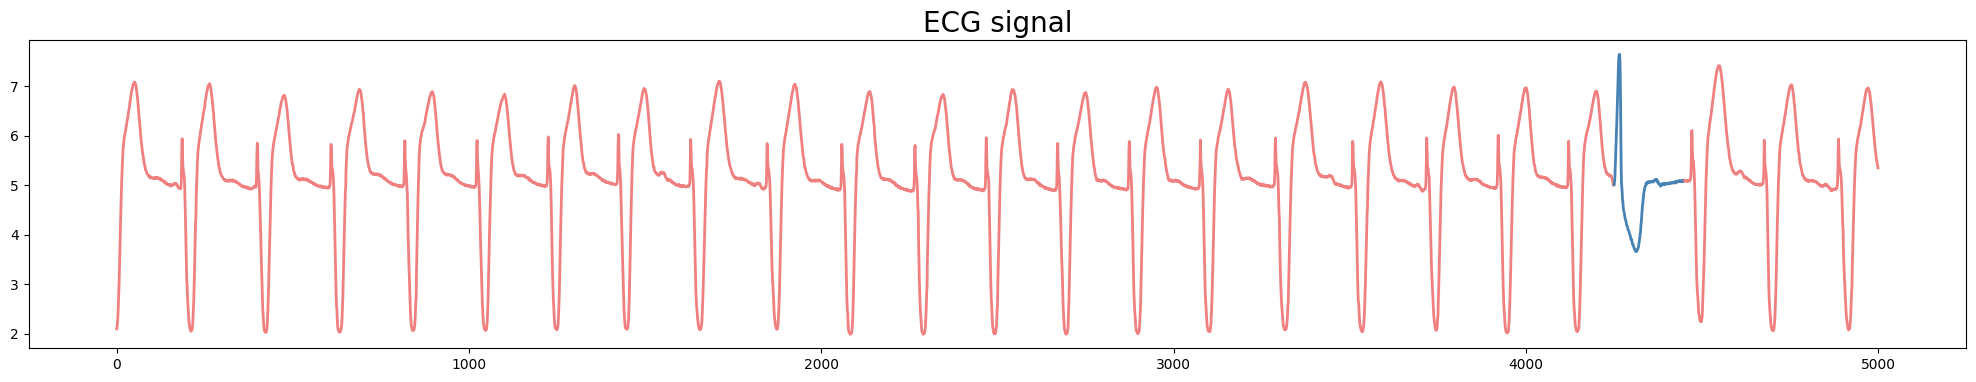

In [4]:
plt.figure(figsize=(25,4))
t1=4250
t2=4450
plt.plot(range(0,t1), s[:t1], color='lightcoral', linewidth=2)
plt.plot(range(t1,t2), s[t1:t2], color='steelblue', linewidth=2)
plt.plot(range(t2,5000), s[t2:5000], color='lightcoral', linewidth=2)
plt.title('ECG signal', fontsize=20)
plt.show()

In [15]:
T=15
d=3

X1 = delay_embedding(s[0:t1], T, d)
X2 = delay_embedding(s[t1-2*T:t2+2*T], T, d)
X3 = delay_embedding(s[t2-2*T:5000], T, d)
print(len(X1[0]), len(X2[0]), len(X3[0]))

4220 230 550


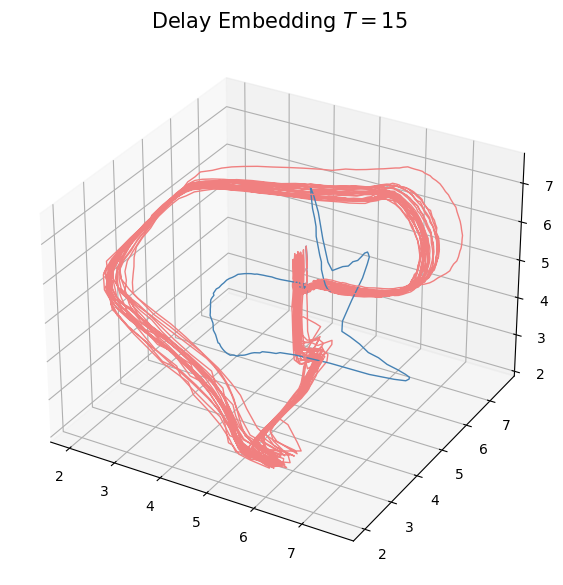

In [6]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.plot(X1[0], X1[1], X1[2], color='lightcoral', linewidth=1)
ax.plot(X2[0], X2[1], X2[2], color='steelblue', linewidth=1)
ax.plot(X3[0], X3[1], X3[2], color='lightcoral', linewidth=1)
plt.title('Delay Embedding $T=15$', size=15)
plt.show()

In [16]:
X = delay_embedding(s[0:4000], T, d, 2)
embedding = np.column_stack((X[0], X[1], X[2]))
X2 = delay_embedding(s[3000:5000], 15, d, 2)
embedding_anomaly = np.column_stack((X2[0], X2[1], X2[2]))

In [17]:
len(embedding), len(embedding_anomaly)

(1985, 985)

In [18]:
from pytesis.results import run_all_intervals

In [20]:
intervals = run_all_intervals(
    embedding_anomaly,
    h=0.3,
    robust_quantile=0.97,
    grid_n=70,
    plot=True,
    B=30
)

Starting run...


KeyboardInterrupt: 

In [ ]:
len(embedding)

In [11]:
from pytesis.datasets import plot_dataset_3d

<Axes3D: title={'center': 'Conjunto de datos'}, xlabel='x', ylabel='y', zlabel='z'>

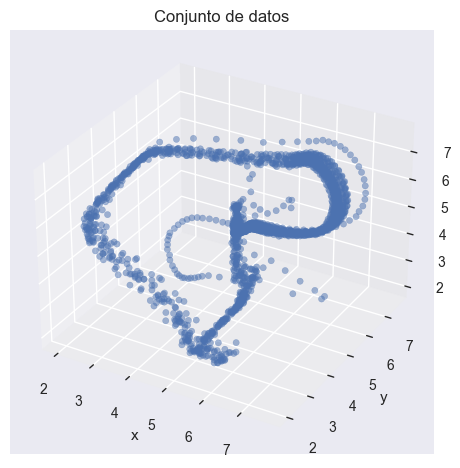

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
plot_dataset_3d(embedding_anomaly, ax=ax)
# plot_dataset_3d(embedding, ax=ax)

In [1]:
from pytesis.datasets import football_sensor, rectangle, plot_dataset
from pytesis.results import run_all_intervals
import numpy as np

# Comments

## Jugadores

- El 14 es mediocampista, deberia haber 4 circulos
- El 8 es lateral, deberia haber 1 solo circulo
- el tag_id=2 es un defensor ofensivo, igual que el 1
- el 5 parece ser medio campista tambien

## De simular:

## Tag 8

- n=800, borde=100, robust=0.95 -> para el tag_id 8 fermat y euclideo detectan bien un agujero
- n=1000, borde=100, robust=0.93 ->  fermat perfecto dun agujeros, euclideo perfecto un agujero, kde sigue en cualquiera h = 20, tiene que ser mas chico

## Tag 2 

- n=800, borde=100, robust=0.95 ->  para el tag_id 2 fermat detecta 2 circulos bien, euclideo no
- n=1000, borde=100, robust=0.93 ->  fermat perfecto dos agujeros, euclideo nada, kde sigue en cualquiera h = 1

## Tag 5

- n=1000, borde=100, robust=0.93 ->  fermat detecta dos agujeros, casi 3, la realidad dificil saber cual es. Euclideo deteca uno solo. kde sigue en cualquiera h = 9

## Tag 14

- n=800, borde=100, robust=0.90 -> tag_id 14 fermat detecta bien los 4 agujeros!! euclideo solo 1 y kde esta en cualquiera para h = 5.
- idem anterior pero robust = 0.93 no funciona
- n=1000, borde=100, robust=0.93 -> tag_id 14 fermat detecta bien los 4 agujeros!! euclideo nada y kde esta en cualquiera para h = 1.
- 

/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: title={'center': 'Conjunto de datos'}, xlabel='x', ylabel='y'>

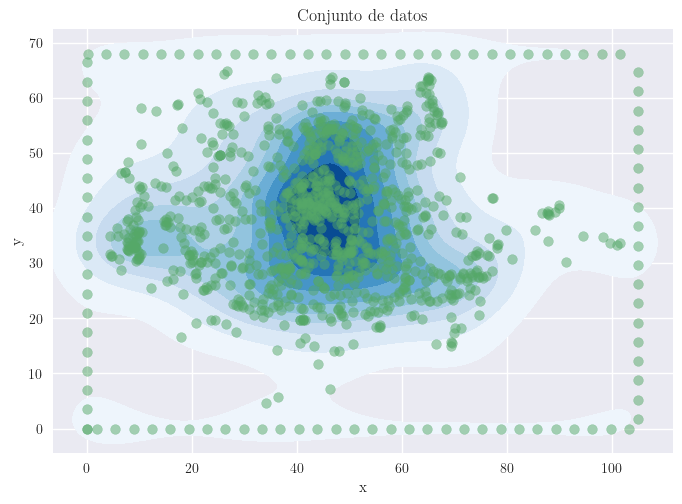

In [71]:
# np.random.seed(12)

plot_dataset(football_X)

In [44]:
length_x, length_y

(105, 68)

Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/diegobatt/git-repos/pytesis-memfce/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

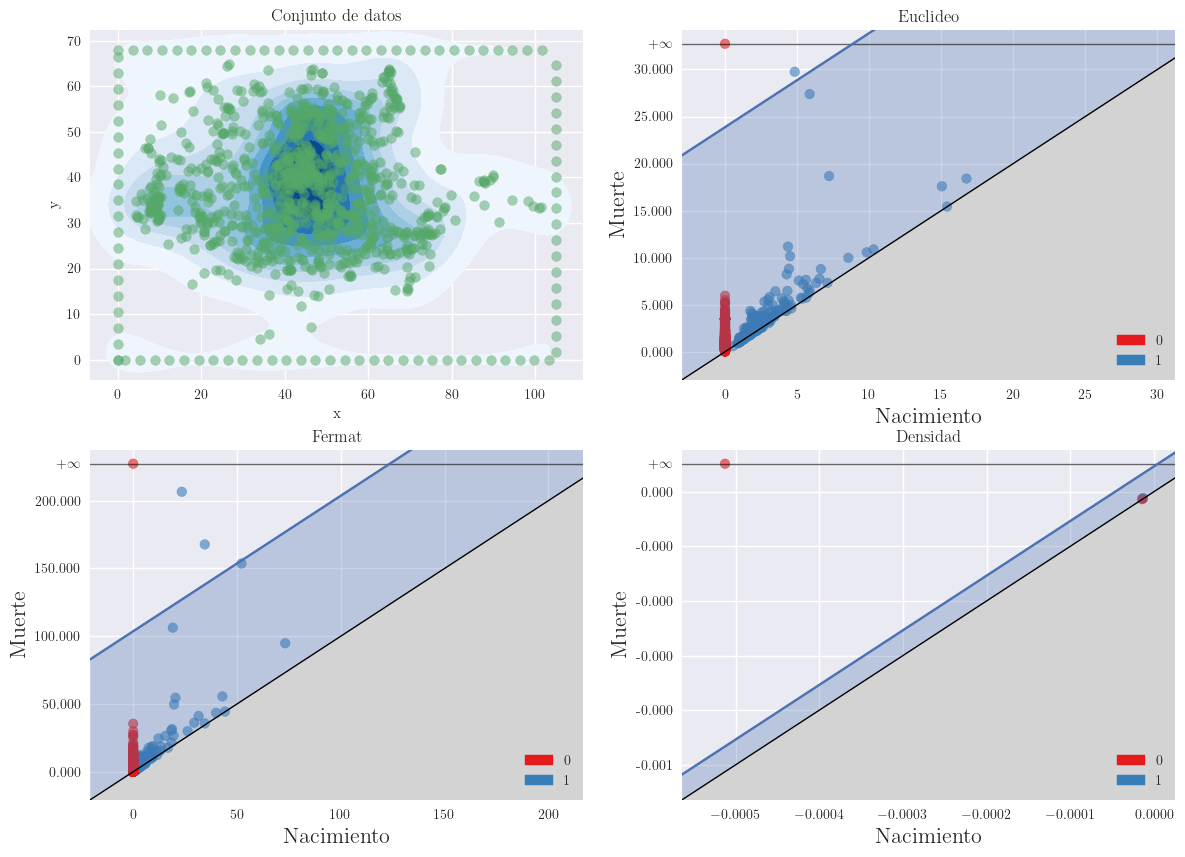

In [72]:
intervals_football = run_all_intervals(
    football_X,
    h=9,
    robust_quantile=0.93,
    plot=True,
    B=100
)